In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
import cv2

In [3]:
def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None
    else:
        pass

In [98]:
# Just for testing binary images


# cap = cv2.VideoCapture(0)

# i = 0
# image_count = 0

# while i < 3:
    
#     ret, frame = cap.read()
#     frame = cv2.flip(frame, 1)
    
#     roi = frame[100:400, 320: 620]
#     cv2.imshow('roi', roi)
#     roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#     (thresh, im_bw) = cv2.threshold(roi, 220, 255, cv2.THRESH_BINARY)
#     cv2.imshow('check',im_bw)
    
#     roi = cv2.resize(roi, (200, 200), interpolation = cv2.INTER_AREA)
    
#     cv2.imshow('scaled image', roi)
#     copy = frame.copy()
#     cv2. rectangle(copy, (320,100), (620, 400), (255, 0, 0), 5)
#     cv2.imshow('frame',copy)
    
#     if cv2.waitKey(1) == 13:
#         image_count = 0
#         i += 1
        
# cap.release()
# cv2.destroyAllWindows()

In [38]:
cap = cv2.VideoCapture(0)

i = 0
image_count = 0

while i < 3:
    
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    
    roi = frame[50:350, 320: 620]
    #cv2.imshow('roi', roi)
    #roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (200, 200), interpolation = cv2.INTER_AREA)
    
    #cv2.imshow('scaled image', roi)
    copy = frame.copy()
    cv2. rectangle(copy, (320,50), (620, 350), (255, 0, 0), 5)
    
    if i == 0:
        image_count = 0
        cv2.putText(copy, "hit enter to record B", (100,100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)
        
    if i == 1:
        image_count += 1
        cv2.putText(copy, "Recording gesture for B - Train", (100,100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)
        cv2.putText(copy, str(image_count), (400,400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_A = './train/2/'
        makedir(gesture_A)
        cv2.imwrite(gesture_A + str(image_count) + ".jpg", roi)
        
    if i == 2:
        image_count += 1
        cv2.putText(copy, "Recording gesture for B - Test", (100,100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)
        cv2.putText(copy, str(image_count), (400,400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_A = './test/2/'
        makedir(gesture_A)
        cv2.imwrite(gesture_A + str(image_count) + ".jpg", roi)  
        
    cv2.imshow('frame',copy)
    
    if cv2.waitKey(1) == 13:
        image_count = 0
        i += 1
        
cap.release()
cv2.destroyAllWindows()

In [39]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, BatchNormalization
import os

In [40]:
num_classes = 3
img_rows, img_cols = 200, 200
batch_size = 32

train_data = './train'
validation_data = './test'

train_datagen = ImageDataGenerator(
                rescale = 1./255,
                )

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_data,
                    target_size = (img_rows, img_cols),
                    batch_size = batch_size,
                    color_mode = 'grayscale',
                    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
                    validation_data,
                    target_size = (img_rows, img_cols),
                    batch_size = batch_size,
                    color_mode = 'grayscale',
                    class_mode = 'categorical')

Found 1561 images belonging to 3 classes.
Found 332 images belonging to 3 classes.


In [55]:
input_shape = (200, 200, 3)

In [56]:
model = tf.keras.Sequential(
  [
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3),input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=128, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=128, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

In [57]:
# model = Sequential()

# model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', input_shape = (200,200,1)))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.20))

# model.add(Dense(num_classes, activation = 'softmax'))

# print(model.summary())

In [58]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 198, 198, 32)      1184      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 21, 21, 64)       

In [59]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

nb_train_samples = 1561
nb_validation_samples = 332

# epochs = 10

# history = model.fit(train_generator,
#                    steps_per_epoch = nb_train_samples//batch_size,
#                    epochs = epochs,
#                    validation_data = validation_generator,
#                    validation_steps = nb_validation_samples // batch_size)

In [60]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='loss', patience = 5)

In [61]:
epochs = 30

history = model.fit(train_generator,
                   steps_per_epoch = nb_train_samples//batch_size,
                   epochs = epochs,
                   validation_data = validation_generator,
                   validation_steps = nb_validation_samples // batch_size,
                   callbacks = [early_stop])

Epoch 1/30


InvalidArgumentError:  input depth must be evenly divisible by filter depth: 1 vs 4
	 [[node sequential_4/conv2d_21/Relu (defined at <ipython-input-61-e94afe589ed4>:3) ]] [Op:__inference_train_function_64040]

Function call stack:
train_function


In [54]:
model.input.shape

TensorShape([None, 200, 200, 3])

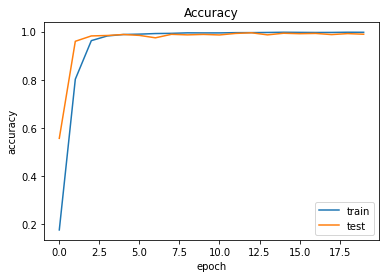

In [27]:
# check training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

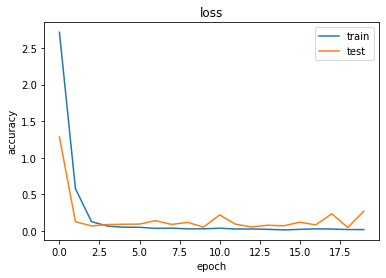

In [28]:
# check training accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [29]:
model.save('changed_model_4.h5')

In [ ]:
https://www.youtube.com/watch?v=YjnGou4skGU&list=PLfne_5LgR4wFe9botq7n5NjaSJQmRQK7O&index=35

In [30]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

nb_train_samples = 13500
nb_validation_samples = 2700

In [31]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='loss', patience = 5)


In [32]:
epochs = 50

history = model.fit(train_generator,
                   steps_per_epoch = nb_train_samples//batch_size,
                   epochs = epochs,
                   validation_data = validation_generator,
                   validation_steps = nb_validation_samples // batch_size,
                   callbacks = [early_stop])

Epoch 1/50
421/421 [==============================] - 353s 838ms/step - loss: 0.0554 - accuracy: 0.9915 - val_loss: 0.0643 - val_accuracy: 0.9911
Epoch 2/50
421/421 [==============================] - 354s 841ms/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0033 - val_accuracy: 0.9981
Epoch 3/50
421/421 [==============================] - 353s 839ms/step - loss: 0.0423 - accuracy: 0.9912 - val_loss: 0.0307 - val_accuracy: 0.9955
Epoch 4/50
421/421 [==============================] - 354s 840ms/step - loss: 0.0205 - accuracy: 0.9958 - val_loss: 0.0706 - val_accuracy: 0.9959
Epoch 5/50
421/421 [==============================] - 354s 841ms/step - loss: 0.0381 - accuracy: 0.9923 - val_loss: 0.0200 - val_accuracy: 0.9948
Epoch 6/50
421/421 [==============================] - 353s 839ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0325 - val_accuracy: 0.9929
Epoch 7/50
421/421 [==============================] - 354s 840ms/step - loss: 0.0348 - accuracy: 0.9936 - val_loss: 0.0337 -

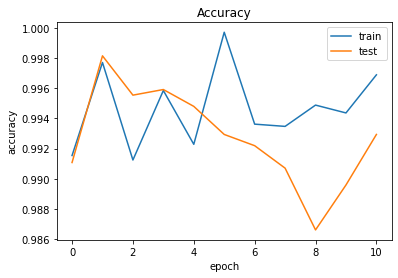

In [33]:
# check training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

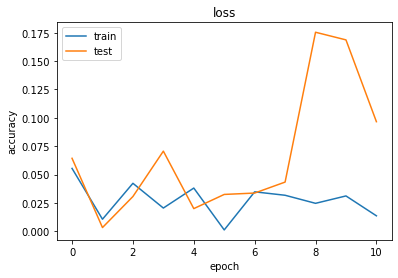

In [34]:
# check training accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [35]:
model.save('changed_model_5.h5')

In [ ]:
# check training accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
model.save('changed_model_3.h5')

In [88]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(200, 200, 1))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(27, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: The input must have 3 channels; got `input_shape=(200, 200, 1)`

In [ ]:
history = model.fit_generator(
    train,
    epochs=10,
    validation_data=val,

    callbacks=[TensorBoard(log_dir='./log')])

In [ ]:
# check training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()


In [ ]:
# check training accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
model.save('changed_model_4.h5')